In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install spectral

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Conv3D, Flatten, Dense, Reshape, BatchNormalization
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
from plotly.offline import init_notebook_mode
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os
import spectral
init_notebook_mode(connected=True)
%matplotlib inline

Using TensorFlow backend.


In [0]:
#si
Xtrain=  np.load('/content/gdrive/My Drive/indiana/KSC/si/x_train_KSC_test_ratio_0.7windowSize25pca15.npy')
Xtest = np.load('/content/gdrive/My Drive/indiana/KSC/si/x_test_KSC_test_ratio_0.7windowSize25pca15.npy')
ytrain = np.load('/content/gdrive/My Drive/indiana/KSC/si/y_train_KSC_test_ratio_0.7windowSize25pca15.npy')
ytest = np.load('/content/gdrive/My Drive/indiana/KSC/si/y_test_KSC_test_ratio_0.7windowSize25pca15.npy')

In [0]:
#ten
Xtrain=  np.load('/content/gdrive/My Drive/indiana/KSC/ten/x_train_KSC_test_ratio_0.9windowSize25pca15.npy')
Xtest = np.load('/content/gdrive/My Drive/indiana/KSC/ten/x_test_KSC_test_ratio_0.9windowSize25pca15.npy')
ytrain = np.load('/content/gdrive/My Drive/indiana/KSC/ten/y_train_KSC_test_ratio_0.9windowSize25pca15.npy')
ytest = np.load('/content/gdrive/My Drive/indiana/KSC/ten/y_test_KSC_test_ratio_0.9windowSize25pca15.npy')

In [0]:
#five
Xtrain=  np.load('/content/gdrive/My Drive/indiana/KSC/five/x_train_KSC_test_ratio_0.95windowSize25pca15.npy')
Xtest = np.load('/content/gdrive/My Drive/indiana/KSC/five/x_test_KSC_test_ratio_0.95windowSize25pca15.npy')
ytrain = np.load('/content/gdrive/My Drive/indiana/KSC/five/y_train_KSC_test_ratio_0.95windowSize25pca15.npy')
ytest = np.load('/content/gdrive/My Drive/indiana/KSC/five/y_test_KSC_test_ratio_0.95windowSize25pca15.npy')

In [0]:
windowSize = 25
K = 15

Xtrain = Xtrain.reshape(-1, windowSize, windowSize, K, 1)
ytrain = np_utils.to_categorical(ytrain)

Xtest = Xtest.reshape(-1, windowSize, windowSize, K, 1)
ytest = np_utils.to_categorical(ytest)
S = windowSize
L = K
input_layer = Input((S, S, L, 1))

# output_units = 16
output_units = 13

## convolutional layers
conv_layer1 = Conv3D(filters=8, kernel_size=(3, 3, 7), activation='relu')(input_layer)
conv_layer2 = Conv3D(filters=16, kernel_size=(3, 3, 5), activation='relu')(conv_layer1)
conv_layer3 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu')(conv_layer2)
print(conv_layer3._shape)
conv3d_shape = conv_layer3._shape
conv_layer3 = Reshape((conv3d_shape[1], conv3d_shape[2], conv3d_shape[3]*conv3d_shape[4]))(conv_layer3)
conv_layer4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu')(conv_layer3)
flatten_layer = Flatten()(conv_layer4)

## fully connected layers
dense_layer1 = Dense(units=256, activation='relu')(flatten_layer)
dense_layer1 = Dropout(0.4)(dense_layer1)
dense_layer2 = Dense(units=128, activation='relu')(dense_layer1)
dense_layer2 = Dropout(0.4)(dense_layer2)
output_layer = Dense(units=output_units, activation='softmax')(dense_layer2)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

adam = Adam(lr=0.001, decay=1e-06)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

filepath = "best-model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=0, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# history = model.fit(x=Xtrain, y=ytrain, batch_size=256, epochs=100)
history = model.fit(x=Xtrain, y=ytrain, batch_size=256, epochs=500 , validation_data=(Xtest, ytest))

model.save('/content/gdrive/My Drive/indiana/KSC/my_model.h5')

(None, 19, 19, 3, 32)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 25, 25, 15, 1)]   0         
_________________________________________________________________
conv3d_18 (Conv3D)           (None, 23, 23, 9, 8)      512       
_________________________________________________________________
conv3d_19 (Conv3D)           (None, 21, 21, 5, 16)     5776      
_________________________________________________________________
conv3d_20 (Conv3D)           (None, 19, 19, 3, 32)     13856     
_________________________________________________________________
reshape_6 (Reshape)          (None, 19, 19, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 64)        55360     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1

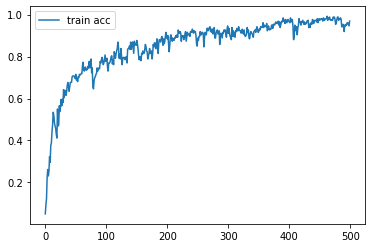

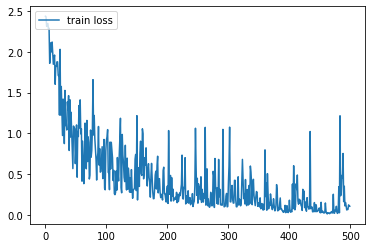

In [0]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
plt.legend(['train acc', 'val_accuracy'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
plt.legend(['train loss', 'val_loss'], loc='upper left')
plt.show()

In [0]:
model.load_weights('/content/gdrive/My Drive/indiana/KSC/my_model.h5')
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


# Xtest = Xtest.reshape(-1, windowSize, windowSize, K, 1)
# ytest = np_utils.to_categorical(ytest)

import warnings
warnings.filterwarnings('always')

Y_pred_test = model.predict(Xtest)
y_pred_test = np.argmax(Y_pred_test, axis=1)


classification = classification_report(np.argmax(ytest, axis=1), y_pred_test)
print(classification)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       723
           1       0.52      0.71      0.60       231
           2       0.72      0.82      0.77       243
           3       0.66      0.36      0.46       239
           4       0.67      0.98      0.80       153
           5       0.47      0.64      0.54       218
           6       0.63      0.22      0.33       100
           7       0.77      0.69      0.73       409
           8       0.82      0.58      0.68       494
           9       0.57      0.51      0.54       384
          10       0.73      0.63      0.68       398
          11       0.61      0.63      0.62       478
          12       0.85      1.00      0.92       881

    accuracy                           0.72      4951
   macro avg       0.68      0.66      0.65      4951
weighted avg       0.72      0.72      0.71      4951



In [0]:
dataset = 'KSC'

def AA_andEachClassAccuracy(confusion_matrix):
    counter = confusion_matrix.shape[0]
    list_diag = np.diag(confusion_matrix)
    list_raw_sum = np.sum(confusion_matrix, axis=1)
    each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
    average_acc = np.mean(each_acc)
    return each_acc, average_acc


def reports (X_test,y_test,name):
    #start = time.time()
    Y_pred = model.predict(X_test)
    y_pred = np.argmax(Y_pred, axis=1)
    #end = time.time()
    #print(end - start)
    if name == 'IP':
        # target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn']
        target_names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']
                        
    elif name == 'KSC':
        target_names = ['1','2','3','4','5','6','7','8','9','10','11','12','13']
    elif name == 'SA':
        target_names = ['Brocoli_green_weeds_1','Brocoli_green_weeds_2','Fallow','Fallow_rough_plow','Fallow_smooth',
                        'Stubble','Celery','Grapes_untrained','Soil_vinyard_develop','Corn_senesced_green_weeds',
                        'Lettuce_romaine_4wk','Lettuce_romaine_5wk','Lettuce_romaine_6wk','Lettuce_romaine_7wk',
                        'Vinyard_untrained','Vinyard_vertical_trellis']
    elif name == 'PU':
        target_names = ['Asphalt','Meadows','Gravel','Trees', 'Painted metal sheets','Bare Soil','Bitumen',
                        'Self-Blocking Bricks','Shadows']
    
    classification = classification_report(np.argmax(y_test, axis=1), y_pred, target_names=target_names)
    oa = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    confusion = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    each_acc, aa = AA_andEachClassAccuracy(confusion)
    kappa = cohen_kappa_score(np.argmax(y_test, axis=1), y_pred)
    score = model.evaluate(X_test, y_test, batch_size=32)
    Test_Loss =  score[0]*100
    Test_accuracy = score[1]*100
    
    return classification, confusion, Test_Loss, Test_accuracy, oa*100, each_acc*100, aa*100, kappa*100



classification, confusion, Test_loss, Test_accuracy, oa, each_acc, aa, kappa = reports(Xtest,ytest,dataset)
classification = str(classification)
confusion = str(confusion)
file_name = "/content/gdrive/My Drive/indiana/KSC/classification_report.txt"

with open(file_name, 'w') as x_file:
    x_file.write('{} Test loss (%)'.format(Test_loss))
    x_file.write('\n')
    x_file.write('{} Test accuracy (%)'.format(Test_accuracy))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{} Kappa accuracy (%)'.format(kappa))
    x_file.write('\n')
    x_file.write('{} Overall accuracy (%)'.format(oa))
    x_file.write('\n')
    x_file.write('{} Average accuracy (%)'.format(aa))
    x_file.write('\n')
    x_file.write('\n')
    x_file.write('{}'.format(classification))
    x_file.write('\n')
    x_file.write('{}'.format(confusion))


def Patch(data,height_index,width_index):
    height_slice = slice(height_index, height_index+PATCH_SIZE)
    width_slice = slice(width_index, width_index+PATCH_SIZE)
    patch = data[height_slice, width_slice, :]
    
    return patch

155/155 [==============================] - 1s 4ms/step - loss: 3.9696 - accuracy: 0.7178


In [0]:
def splitTrainTestSet(X, y, testRatio, randomState=345):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testRatio, random_state=randomState, stratify=y)
    return X_train, X_test, y_train, y_test

def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

#----KSC------
t = sio.loadmat('/content/gdrive/My Drive/indiana/KSC/KSC.mat')
f = sio.loadmat('/content/gdrive/My Drive/indiana/KSC/KSC_gt.mat')
X = t['KSC']
y = f['KSC_gt']

height = y.shape[0]
width = y.shape[1]


PATCH_SIZE = windowSize
numComponents = K

X,pca = applyPCA(X, numComponents=numComponents)
X = padWithZeros(X, PATCH_SIZE//2)

# calculate the predicted image
outputs = np.zeros((height,width))
for i in range(height):
    for j in range(width):
        target = int(y[i,j])
        if target == 0 :
            continue
        else :
            image_patch=Patch(X,i,j)
            X_test_image = image_patch.reshape(1,image_patch.shape[0],image_patch.shape[1], image_patch.shape[2], 1).astype('float32')                                   
            prediction = (model.predict(X_test_image))
            prediction = np.argmax(prediction, axis=1)
            outputs[i][j] = prediction+1

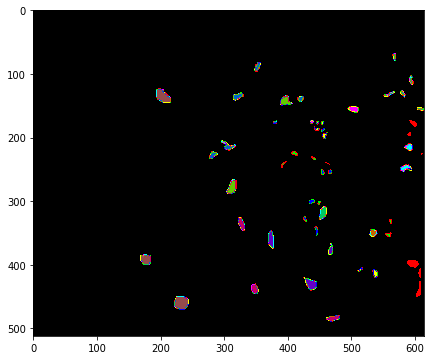

In [0]:
import spectral
ground_truth = spectral.imshow(classes = y,figsize =(7,7))

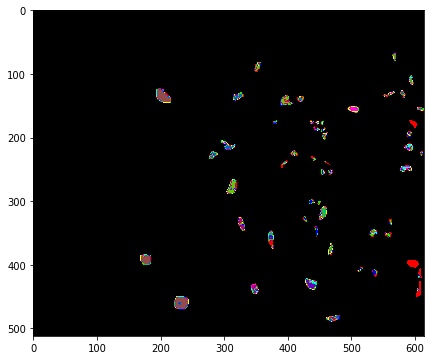

In [0]:
predict_image = spectral.imshow(classes = outputs.astype(int),figsize =(7,7))